### Importing Libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Data

In [2]:
df = pd.read_csv('gdp_of_world.csv')
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


### Data Munging

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [4]:
# Finding null values

df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [5]:
# finding medians region wise

df.groupby('Region')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture','Climate','Industry', 'Service']].median()

,GDP ($ per capita),Literacy (%),Agriculture,Climate,Industry,Service
Region,,,,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610,2.00,0.2815,0.4950
BALTICS,11400.0,99.80,0.0400,3.00,0.2940,0.6660
C.W. OF IND. STATES,3450.0,99.05,0.1980,2.75,0.3295,0.4595
EASTERN EUROPE,9100.0,98.60,0.0815,3.00,0.3095,0.5910
LATIN AMER. & CARIB,6300.0,94.05,0.0700,2.00,0.2590,0.6180
NEAR EAST,9250.0,83.00,0.0350,1.00,0.3520,0.5840
NORTHERN AFRICA,6000.0,70.00,0.1320,1.00,0.3570,0.4255
NORTHERN AMERICA,29800.0,97.50,0.0100,2.00,0.2040,0.7870
OCEANIA,5000.0,95.00,0.1505,2.00,0.1710,0.6440


In [6]:
df.groupby('Region')['GDP ($ per capita)'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
ASIA (EX. NEAR EAST),28.0,8053.571429,9166.787156,500.0,1800.0,3450.0,11200.0,28800.0
BALTICS,3.0,11300.000000,1053.565375,10200.0,10800.0,11400.0,11850.0,12300.0
C.W. OF IND. STATES,12.0,4000.000000,2461.706725,1000.0,1775.0,3450.0,5875.0,8900.0
EASTERN EUROPE,12.0,9808.333333,4978.765516,2200.0,6550.0,9100.0,13450.0,19000.0
LATIN AMER. & CARIB,45.0,8682.222222,6658.463134,1600.0,4100.0,6300.0,11000.0,35000.0
NEAR EAST,16.0,10456.250000,8447.876952,600.0,2850.0,9250.0,19050.0,23200.0
NORTHERN AFRICA,5.0,5460.000000,1370.401401,4000.0,4000.0,6000.0,6400.0,6900.0
NORTHERN AMERICA,5.0,26100.000000,12791.012470,6900.0,20000.0,29800.0,36000.0,37800.0
OCEANIA,21.0,8247.619048,8095.221989,800.0,2200.0,5000.0,12500.0,29000.0


In [7]:
# filling null values by mode and median

for col in df.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = df.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = df.groupby('Region')[col].median()
    for region in df['Region'].unique():
        df[col].loc[(df[col].isnull())&(df['Region']==region)] = guess_values[region]

C:\Users\masra\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Performing Exploratory Data Analysis

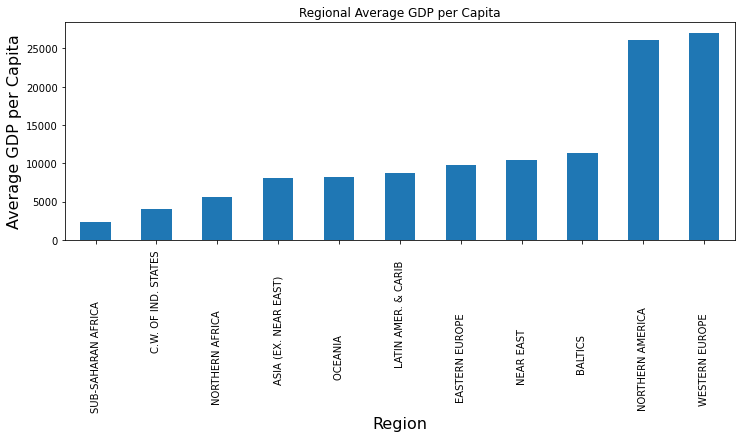

In [8]:
# Plotting graph to find regional average GDP per capita

fig, ax = plt.subplots(figsize=(12,4))
df.groupby('Region')['GDP ($ per capita)'].mean().sort_values().plot(kind='bar')
plt.title('Regional Average GDP per Capita')
plt.xlabel("Region")
plt.ylabel('Average GDP per Capita')
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.show()

Text(0.5, 1.0, 'Regional Average GDP per Capita')

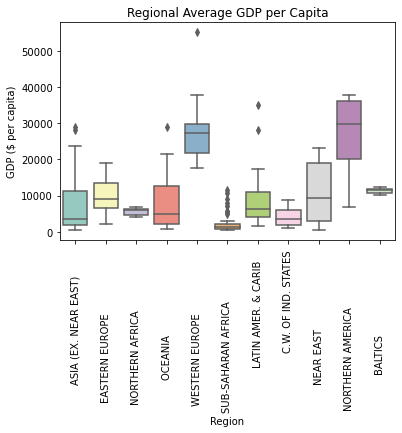

In [9]:
# Observing quantile ranges region wise wrt GDP per capita

sns.boxplot(x="Region",y="GDP ($ per capita)", data=df, palette="Set3")
plt.xticks(rotation=90)
plt.title("Regional Average GDP per Capita")

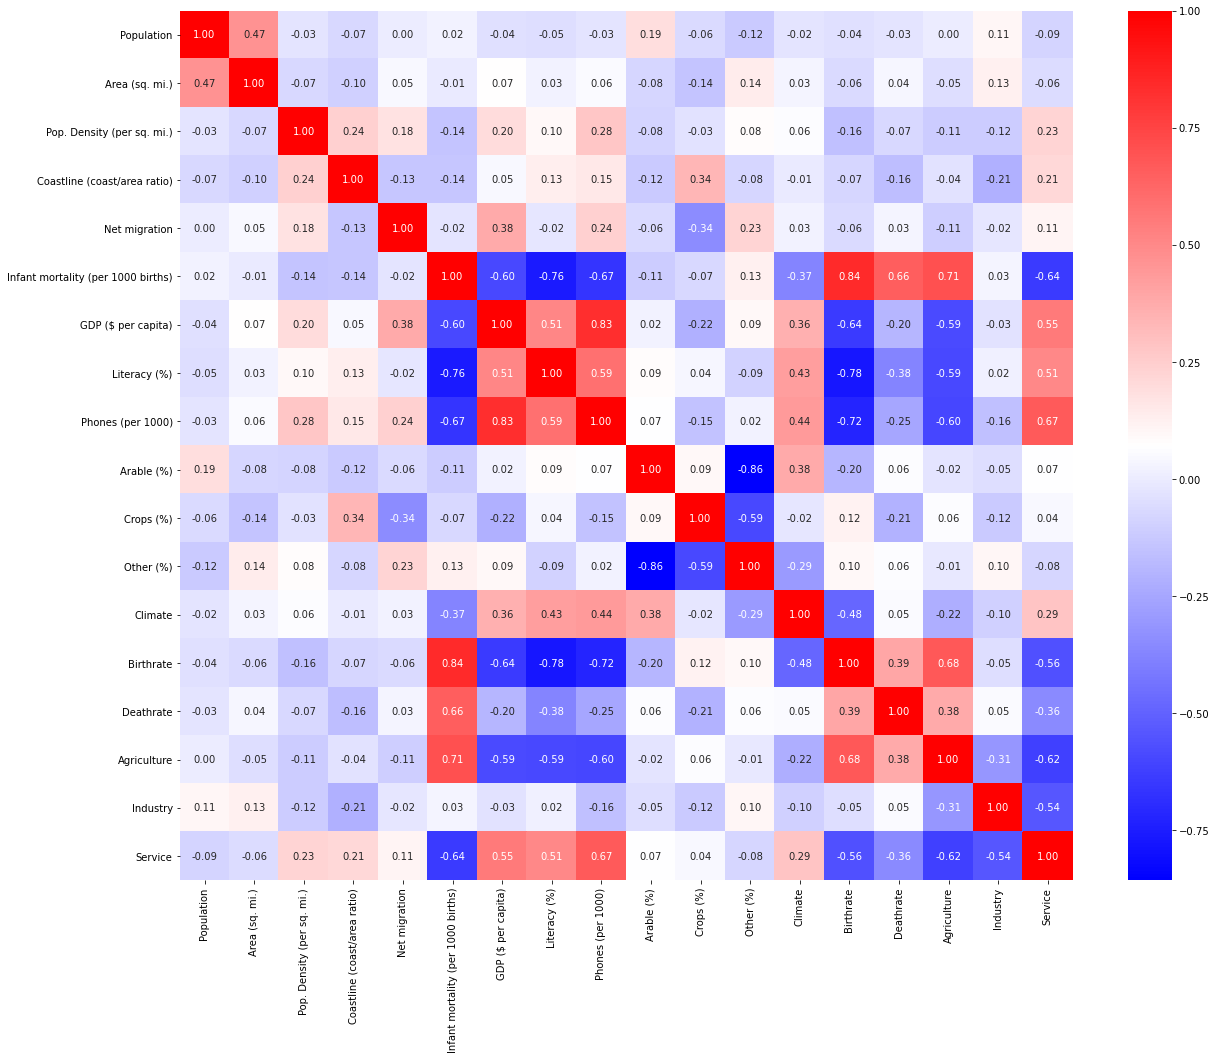

In [10]:
# plotting and correlation of each feature wrt to all others features

plt.figure(figsize=(20,16))
sns.heatmap(data = df.iloc[:,2:].corr(), annot=True, fmt='.2f', cmap='bwr')
plt.show()

In [11]:
# finding and sorting top 20 countries wrt to their GDP 

top_20 = df.sort_values('GDP ($ per capita)',ascending=False).head(20)

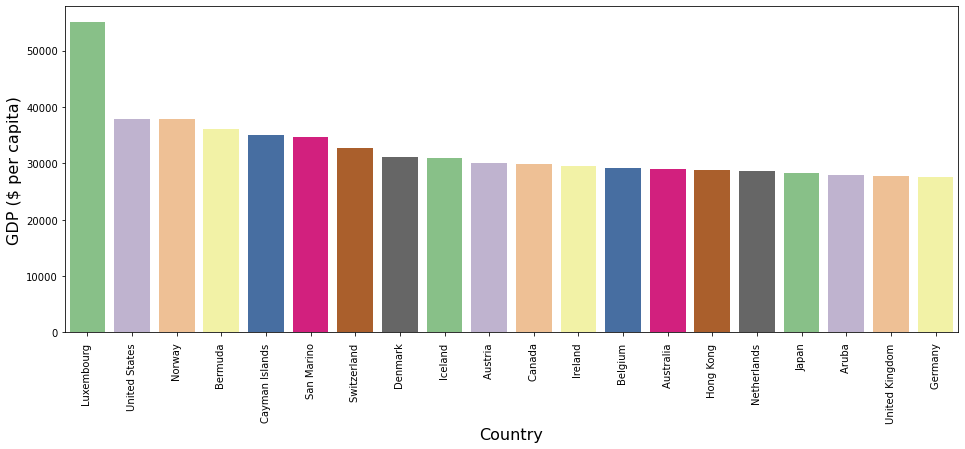

In [12]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_20, palette='Accent')
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

In [13]:
# finding and sorting countries with low birthrate as well as low GDP

x = df.loc[(df['Birthrate']<14) & (df['GDP ($ per capita)'] < 10000)].sort_values(by='GDP ($ per capita)', ascending=False)
x

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
204,Trinidad & Tobago,LATIN AMER. & CARIB,1065842,5128,207.9,7.06,-10.83,24.31,9500.0,98.6,303.5,14.62,9.16,76.22,2.0,12.90,10.57,0.007,0.570,0.423
169,Russia,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,99.6,280.6,7.33,0.11,92.56,4.0,9.95,14.65,0.054,0.371,0.575
30,Bulgaria,EASTERN EUROPE,7385367,110910,66.6,0.32,-4.58,20.55,7600.0,98.6,336.3,40.02,1.92,58.06,3.0,9.65,14.27,0.093,0.304,0.603
201,Thailand,ASIA (EX. NEAR EAST),64631595,514000,125.7,0.63,0.00,20.48,7400.0,92.6,108.9,29.36,6.46,64.18,2.0,13.87,7.04,0.099,0.441,0.460
168,Romania,EASTERN EUROPE,22303552,237500,93.9,0.09,-0.13,26.43,7000.0,98.4,196.9,40.82,2.25,56.93,3.0,10.70,11.77,0.101,0.350,0.549
174,St Pierre & Miquelon,NORTHERN AMERICA,7026,242,29.0,49.59,-4.86,7.54,6900.0,99.0,683.2,13.04,0.00,86.96,3.0,13.52,6.83,0.010,0.204,0.787
123,Macedonia,EASTERN EUROPE,2050554,25333,80.9,0.00,-1.45,10.09,6700.0,98.6,260.0,22.26,1.81,75.93,3.0,12.02,8.77,0.118,0.319,0.563
18,Belarus,C.W. OF IND. STATES,10293011,207600,49.6,0.00,2.54,13.37,6100.0,99.6,319.1,29.55,0.60,69.85,4.0,11.16,14.02,0.093,0.316,0.591
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,98.6,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
211,Ukraine,C.W. OF IND. STATES,46710816,603700,77.4,0.46,-0.39,20.34,5400.0,99.7,259.9,56.21,1.61,42.18,3.0,8.82,14.39,0.187,0.452,0.361


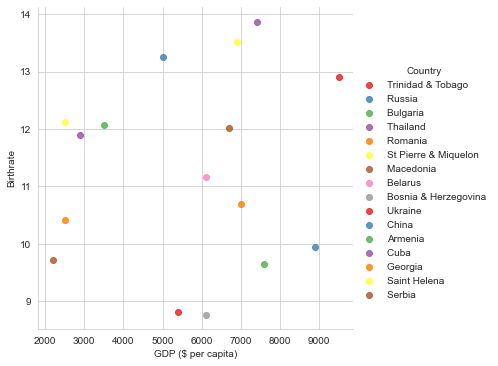

In [14]:
sns.set_style('whitegrid')
sns.lmplot(hue='Country', x='GDP ($ per capita)', y='Birthrate', data=x, palette='Set1')

In [15]:
# performing label encoding for converting categorical data into numericals
# labelling climate feature is for easy to use (optional)

LE = LabelEncoder()
df['Regional_label'] = LE.fit_transform(df['Region'])
df['Climate_label'] = LE.fit_transform(df['Climate'])
df.head(20)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Regional_label,Climate_label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.3800,0.240,0.380,0,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.2320,0.188,0.579,3,4
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.1010,0.600,0.298,6,0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,15.00,75.00,2.0,22.46,3.27,0.1505,0.171,0.644,8,2
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,0.00,97.78,3.0,8.71,6.25,0.0220,0.245,0.720,10,4
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,...,0.24,97.35,2.0,45.11,24.20,0.0960,0.658,0.246,9,2
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,...,0.00,100.00,2.0,14.17,5.34,0.0400,0.180,0.780,4,2
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,...,4.55,77.27,2.0,16.93,5.37,0.0380,0.220,0.743,4,2
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,...,0.48,87.21,3.0,16.73,7.55,0.0950,0.358,0.547,4,4
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,...,2.30,80.15,4.0,12.07,8.23,0.2390,0.343,0.418,2,5


In [16]:
df.Climate_label.value_counts()

2    115
4     61
0     32
1      8
5      8
3      3
Name: Climate_label, dtype: int64

In [17]:
df.Climate.value_counts()

2.0    115
3.0     61
1.0     32
4.0      8
1.5      8
2.5      3
Name: Climate, dtype: int64

In [18]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service', 'Regional_label',
       'Climate_label'],
      dtype='object')

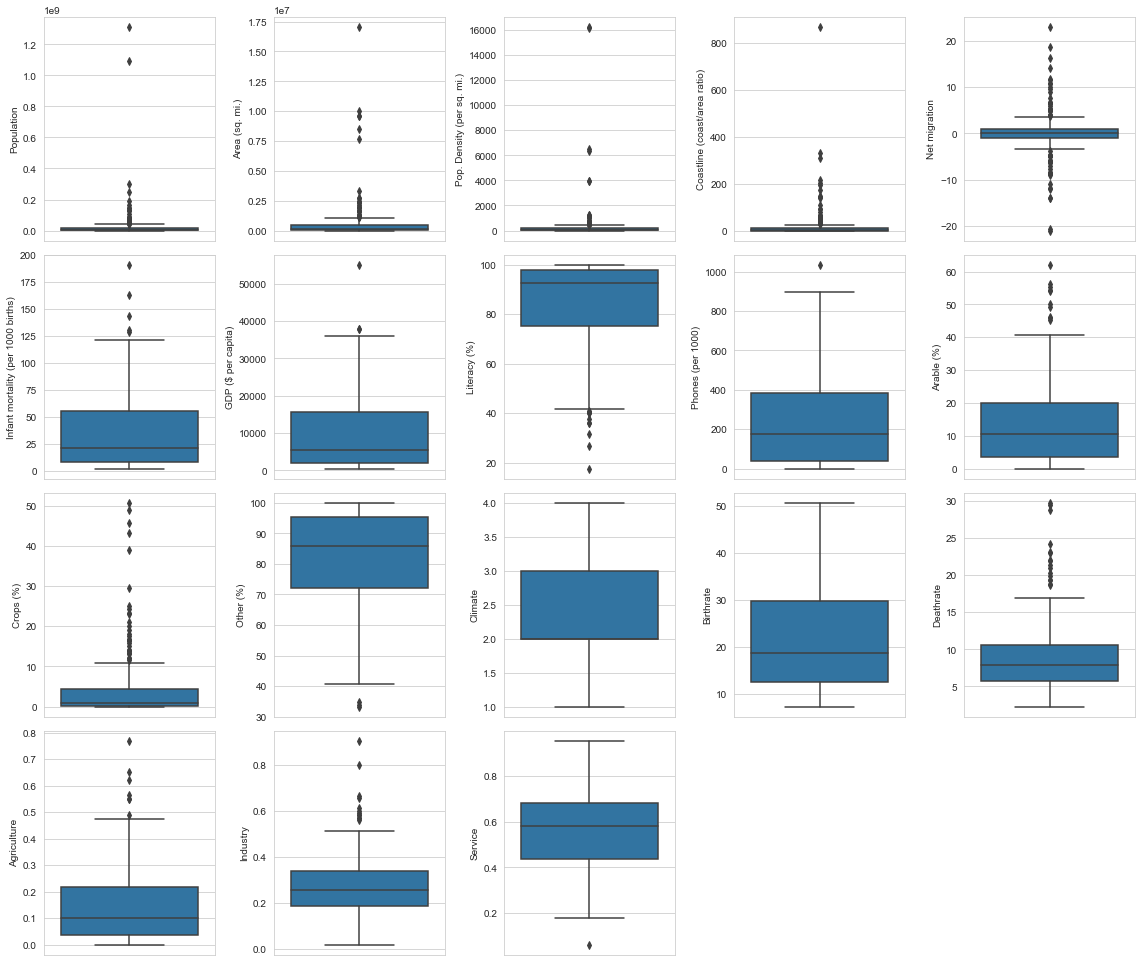

In [19]:
# Boxplot for distribution analysis of numerical features
# finding outliers of each feature

fig = plt.figure(figsize=(16,30))
features= ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'
       ]
for i in range(len(features)):
    fig.add_subplot(9, 5, i+1)
    sns.boxplot(y=df[features[i]])
plt.tight_layout()
plt.show()

C:\Users\masra\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


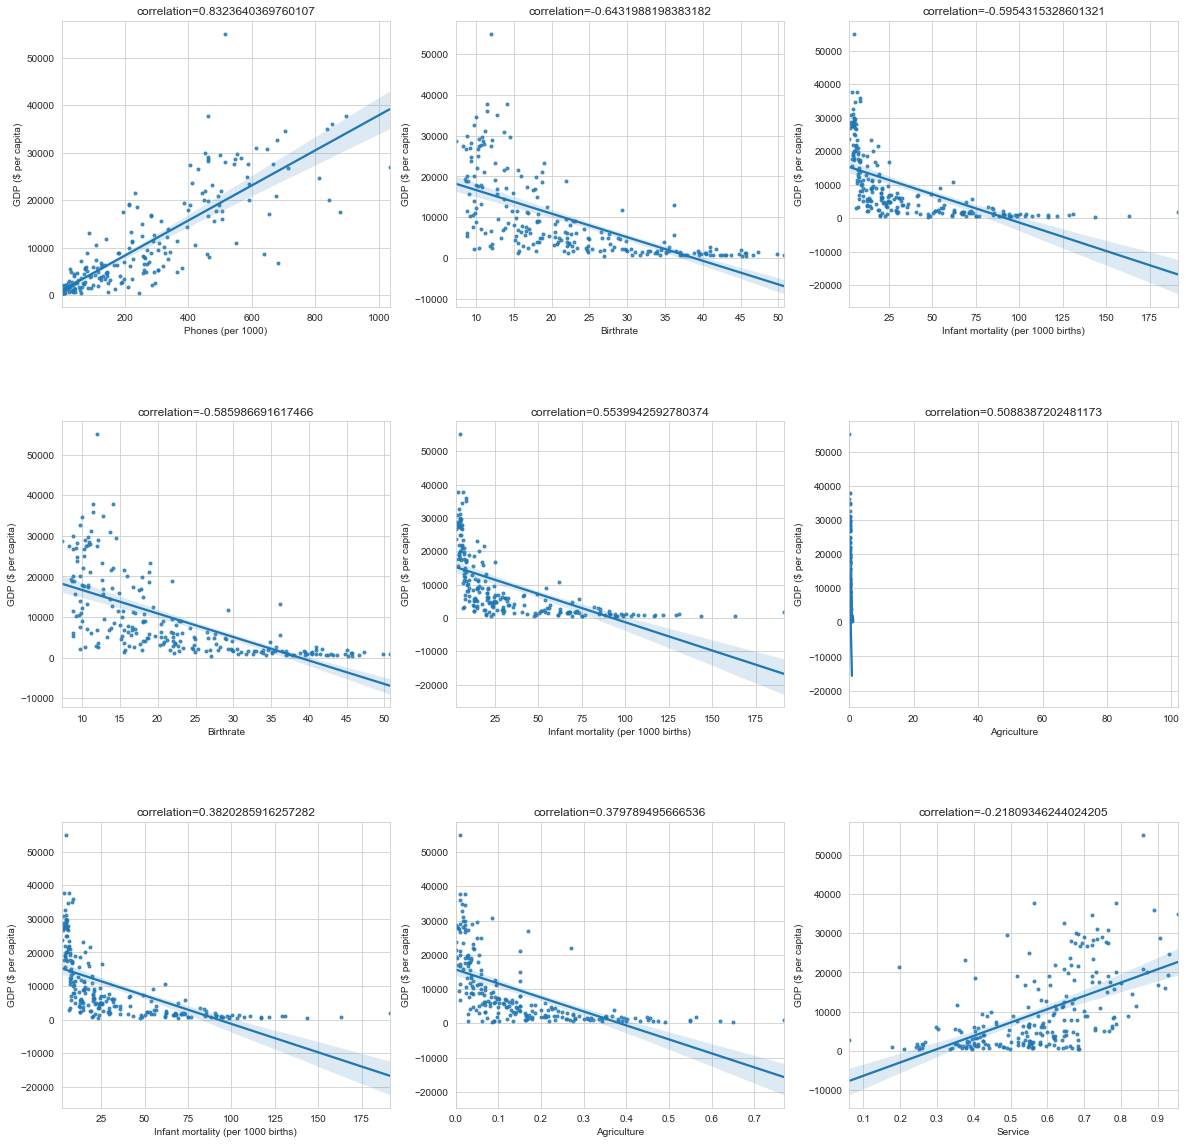

In [20]:
# Regplot to find correlation of GDP per capita with all other numeical features.
# Reg line to find the slope of correlations

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in df.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = df['GDP ($ per capita)'].corr(df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i+j], y='GDP ($ per capita)', data=df,
                   ax=axes[i,j], fit_reg=True, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In [21]:
df = df.astype({'Country':'category', 'Region':'category'})

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Country                             227 non-null    category
 1   Region                              227 non-null    category
 2   Population                          227 non-null    int64   
 3   Area (sq. mi.)                      227 non-null    int64   
 4   Pop. Density (per sq. mi.)          227 non-null    float64 
 5   Coastline (coast/area ratio)        227 non-null    float64 
 6   Net migration                       227 non-null    float64 
 7   Infant mortality (per 1000 births)  227 non-null    float64 
 8   GDP ($ per capita)                  227 non-null    float64 
 9   Literacy (%)                        227 non-null    float64 
 10  Phones (per 1000)                   227 non-null    float64 
 11  Arable (%)                      

### Training and Splitting

In [23]:
train, test = train_test_split(df, test_size=0.3, shuffle=True)
training_features = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service', 'Regional_label',
       'Climate_label']
target = 'GDP ($ per capita)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

### Building and evaluating model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [25]:
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 6.264555458907205e-11 msle_train: 1.8233671049791995e-28
rmse_test: 1.784586333377241e-11 msle_test: 1.0870274618610697e-28


### Exporting train and test files

In [26]:
train_file = train_X.to_csv('train2.csv')
train_file

In [27]:
test_file = test_X.to_csv('test2.csv')
test_file